<a href="https://colab.research.google.com/github/Narden01/task1-titanic-classification/blob/main/Task_1_Data_science_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [6]:
df.shape

(418, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

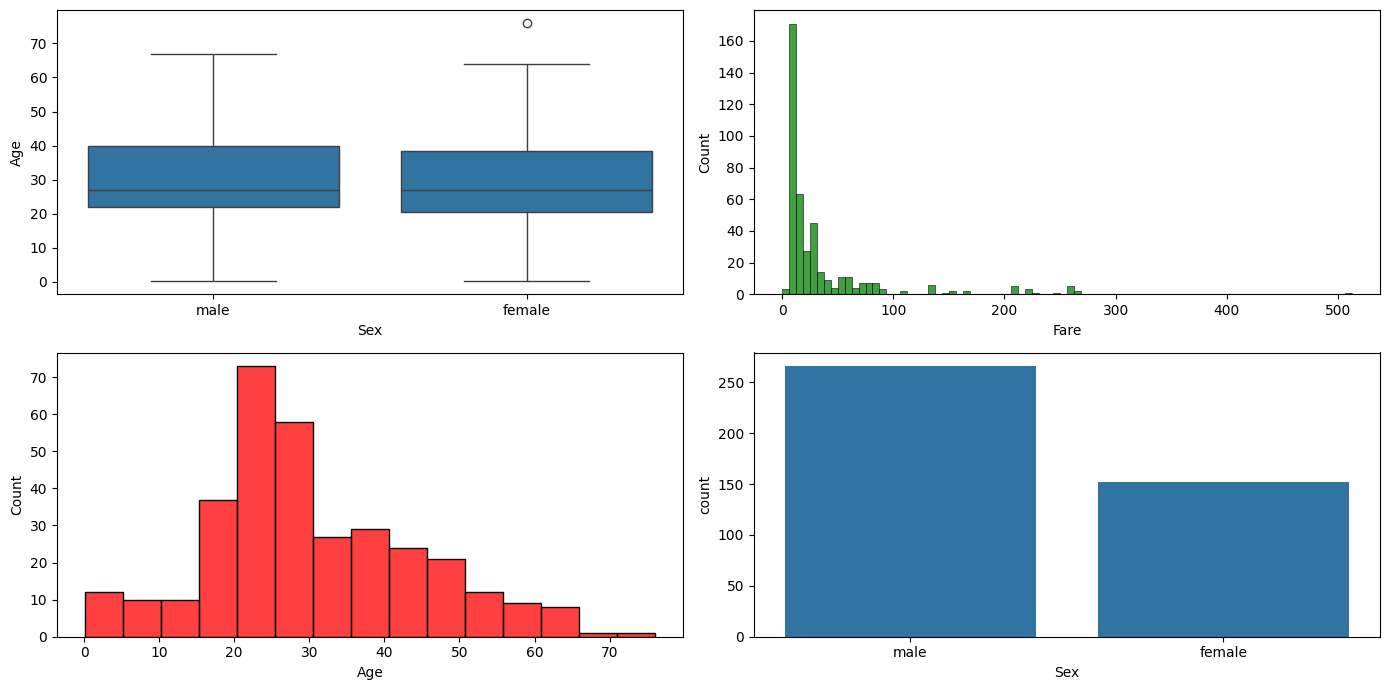

In [9]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.histplot(df['Fare'],color='green')

plt.subplot(2,2,3)
sns.histplot(df['Age'],color='red')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()

<ipython-input-10-a0febac0f8b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


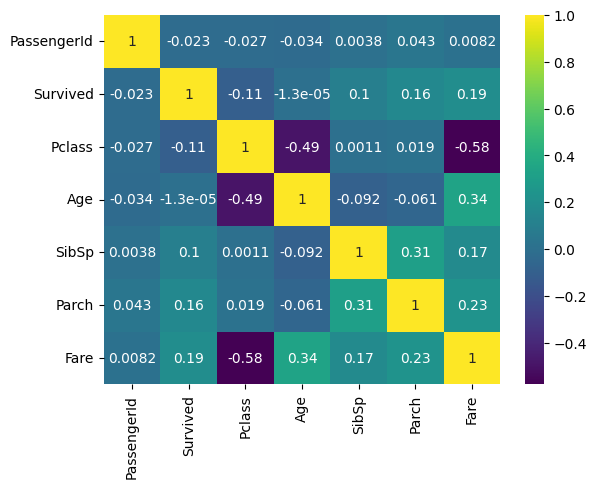

In [10]:
corr = df.corr()

corr
sns.heatmap(corr, cmap='viridis', annot = True);

data cleaning and feature engineering

In [11]:
df2=df.copy()

In [12]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


dropping the non usefull columns according to their correlation and our logic

In [13]:
df2.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [15]:
df2.isna().sum()


Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

handlling missing values

In [16]:
df2.loc[df.isna().sum(axis=1) > 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,34.5,0,0,330911,7.8292
1,1,3,female,47.0,1,0,363272,7.0000
2,0,2,male,62.0,0,0,240276,9.6875
3,0,3,male,27.0,0,0,315154,8.6625
4,1,3,female,22.0,1,1,3101298,12.2875
...,...,...,...,...,...,...,...,...
412,1,3,female,28.0,0,0,347086,7.7750
413,0,3,male,NaN,0,0,A.5. 3236,8.0500
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,0,3,male,NaN,0,0,359309,8.0500


In [18]:
# Filled the missing value in Age column with the median value
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

# Filled the missing value in Fare columns with median Value
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median())

In [19]:
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

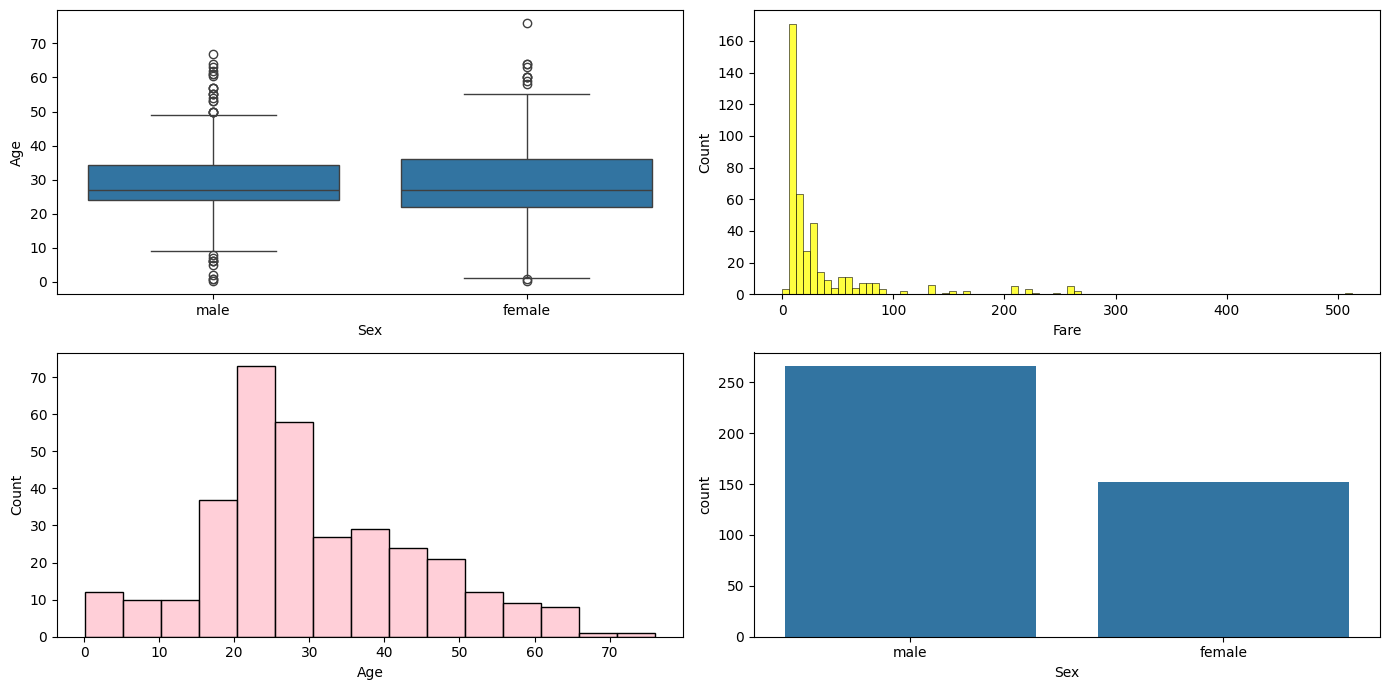

In [23]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df2)

plt.subplot(2,2,2)
sns.histplot(df['Fare'],color='yellow')

plt.subplot(2,2,3)
sns.histplot(df['Age'],color='pink')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df2)

plt.tight_layout()
plt.show()

In [24]:
df2[df2['Age']>=60]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500
114,1,1,female,63.0,1,0,PC 17483,221.7792
142,0,1,male,61.0,1,3,PC 17608,262.3750
152,0,3,male,60.5,0,0,3701,14.4542
179,1,1,female,64.0,0,2,PC 17756,83.1583


In [25]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Label encoding the non numeric features for the model

In [27]:
from sklearn.preprocessing import LabelEncoder

sex_le = LabelEncoder()

sex_le.fit(df2['Sex'])
df2['Sex'] = sex_le.transform(df2['Sex'])

In [29]:
df2.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
413,0,3,1,27.0,0,0,A.5. 3236,8.0500
414,1,1,0,39.0,0,0,PC 17758,108.9000
415,0,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,0,3,1,27.0,0,0,359309,8.0500
417,0,3,1,27.0,1,1,2668,22.3583


In [31]:
# Extract numeric part from 'Ticket' column using regular expressions
df2['Ticket'] = df2['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [32]:
x = df2.drop(['Survived'],axis=1)
y = df2['Survived']

In [33]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,34.5,0,0,330911,7.8292
1,3,0,47.0,1,0,363272,7.0000
2,2,1,62.0,0,0,240276,9.6875
3,3,1,27.0,0,0,315154,8.6625
4,3,0,22.0,1,1,3101298,12.2875


In [34]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [35]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model building

In [37]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)  # You can adjust max_iter as needed
}

In [38]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        52
           1       0.00      0.00      0.00        32

    accuracy                           0.62        84
   macro avg       0.31      0.50      0.38        84
weighted avg       0.38      0.62      0.47        84


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network - Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77        52
           1       0.64      0.22      0.33        32

    accuracy                           0.65        84
   macro avg       0.65      0.57      0.55        84
weighted avg       0.65      0.65      0.60        84




the best model are desicion tree and random forecast due to the high accuracy they have

Question: What factors were most likely
lead to success-socio-economic status, age, gender
and more?

ANSWER: Gender: Women had a significantly higher survival rate than men.
Socio-economic Status: Passengers in higher classes tended to have better survival odds.
Age: Children were more likely to survive than adults.